In [8]:
! pip install calmap

In [9]:
! pip install plotly

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

In [11]:
## uncomment the below line as to load dataset from your side
# data = pd.read_csv("F:\covid19_tweets.csv",encoding='ISO-8859-1')

import os
path = os.getcwd()
BASE_DIR = os.path.abspath(path)

file_loc = BASE_DIR + "\covid19_tweets.csv"

data = pd.read_csv(file_loc,encoding='ISO-8859-1')

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179108 entries, 0 to 179107
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   user_name         179108 non-null  object
 1   user_location     142337 non-null  object
 2   user_description  168822 non-null  object
 3   user_created      179108 non-null  object
 4   user_followers    179108 non-null  int64 
 5   user_friends      179108 non-null  int64 
 6   user_favourites   179108 non-null  int64 
 7   user_verified     179108 non-null  bool  
 8   date              179108 non-null  object
 9   text              179108 non-null  object
 10  hashtags          127774 non-null  object
 11  source            179031 non-null  object
 12  is_retweet        179108 non-null  bool  
dtypes: bool(2), int64(3), object(8)
memory usage: 15.4+ MB


In [13]:
data.head()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
0,áá¥â»Õ¬ê Ï®,astroworld,wednesday addams as a disney princess keepin i...,2017-05-26 05:46:42,624,950,18775,False,2020-07-25 12:27:21,If I smelled the scent of hand sanitizers toda...,NaN,Twitter for iPhone,False
1,Tom Basile ðºð¸,"New York, NY","Husband, Father, Columnist & Commentator. Auth...",2009-04-16 20:06:23,2253,1677,24,True,2020-07-25 12:27:17,Hey @Yankees @YankeesPR and @MLB - wouldn't it...,NaN,Twitter for Android,False
2,Time4fisticuffs,"Pewee Valley, KY",#Christian #Catholic #Conservative #Reagan #Re...,2009-02-28 18:57:41,9275,9525,7254,False,2020-07-25 12:27:14,@diane3443 @wdunlap @realDonaldTrump Trump nev...,['COVID19'],Twitter for Android,False
3,ethel mertz,Stuck in the Middle,#Browns #Indians #ClevelandProud #[]_[] #Cavs ...,2019-03-07 01:45:06,197,987,1488,False,2020-07-25 12:27:10,@brookbanktv The one gift #COVID19 has give me...,['COVID19'],Twitter for iPhone,False
4,DIPR-J&K,Jammu and Kashmir,ðï¸Official Twitter handle of Department o...,2017-02-12 06:45:15,101009,168,101,False,2020-07-25 12:27:08,25 July : Media Bulletin on Novel #CoronaVirus...,"['CoronaVirusUpdates', 'COVID19']",Twitter for Android,False


In [14]:
data.describe()

,user_followers,user_friends,user_favourites
count,1.791080e+05,179108.000000,1.791080e+05
mean,1.090555e+05,2121.701566,1.444411e+04
std,8.414670e+05,9162.553072,4.452270e+04
min,0.000000e+00,0.000000,0.000000e+00
25%,1.720000e+02,148.000000,2.060000e+02
50%,9.920000e+02,542.000000,1.791000e+03
75%,5.284000e+03,1725.250000,9.388000e+03
max,4.944256e+07,497363.000000,2.047197e+06


Missing data

In [15]:
percent=(data.isnull().sum()/data.isnull().count())*100
percent

user_name            0.000000
user_location       20.530071
user_description     5.742904
user_created         0.000000
user_followers       0.000000
user_friends         0.000000
user_favourites      0.000000
user_verified        0.000000
date                 0.000000
text                 0.000000
hashtags            28.660920
source               0.042991
is_retweet           0.000000
dtype: float64

In [16]:
total = data.isnull().sum()
percent = (data.isnull().sum()/data.isnull().count()*100)
tt = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
types = []
for col in data.columns:
    dtype = str(data[col].dtype)
    types.append(dtype)
tt['Types'] = types

tt



,Total,Percent,Types
user_name,0,0.000000,object
user_location,36771,20.530071,object
user_description,10286,5.742904,object
user_created,0,0.000000,object
user_followers,0,0.000000,int64
user_friends,0,0.000000,int64
user_favourites,0,0.000000,int64
user_verified,0,0.000000,bool
date,0,0.000000,object
text,0,0.000000,object


In [17]:
total = data.count()
tt = pd.DataFrame(total)
tt.columns = ['Total']
uniques = []
for col in data.columns:
    unique = data[col].nunique()
    uniques.append(unique)
tt['Uniques'] = uniques
tt

,Total,Uniques
user_name,179108,92276
user_location,142337,26920
user_description,168822,89200
user_created,179108,93708
user_followers,179108,27694
user_friends,179108,11022
user_favourites,179108,35259
user_verified,179108,2
date,179108,136611
text,179108,178683


In [18]:
total = data.count()
tt = pd.DataFrame(total)
tt.columns = ['Total']
items = []
vals = []
for col in data.columns:
    itm = data[col].value_counts().index[0]
    val = data[col].value_counts().values[0]
    items.append(itm)
    vals.append(val)
tt['Most frequent item'] = items
tt['Frequence'] = vals
tt['Percent from total'] = np.round(vals / total * 100, 3)

tt
    



,Total,Most frequent item,Frequence,Percent from total
user_name,179108,GlobalPandemic.NET,679,0.379
user_location,142337,India,3741,2.628
user_description,168822,Breaking News & Critical Information to SURVIV...,679,0.402
user_created,179108,2010-07-13 21:58:05,679,0.379
user_followers,179108,0,1662,0.928
user_friends,179108,0,2839,1.585
user_favourites,179108,0,5268,2.941
user_verified,179108,False,156013,87.106
date,179108,2020-08-06 16:00:00,26,0.015
text,179108,"The incompetence of this administration, and t...",13,0.007


Visualizing tweets with location

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'India'),
  Text(1, 0, 'United States'),
  Text(2, 0, 'New Delhi, India'),
  Text(3, 0, 'Mumbai, India'),
  Text(4, 0, 'Washington, DC'),
  Text(5, 0, 'London, England'),
  Text(6, 0, 'United Kingdom'),
  Text(7, 0, 'London'),
  Text(8, 0, 'New York, NY'),
  Text(9, 0, 'Australia'),
  Text(10, 0, 'Worldwide'),
  Text(11, 0, 'Canada'),
  Text(12, 0, 'New Delhi'),
  Text(13, 0, 'USA'),
  Text(14, 0, 'UK'),
  Text(15, 0, 'WORLDWIDE'),
  Text(16, 0, 'Los Angeles, CA'),
  Text(17, 0, 'South Africa'),
  Text(18, 0, 'Lagos, Nigeria'),
  Text(19, 0, 'California, USA')])

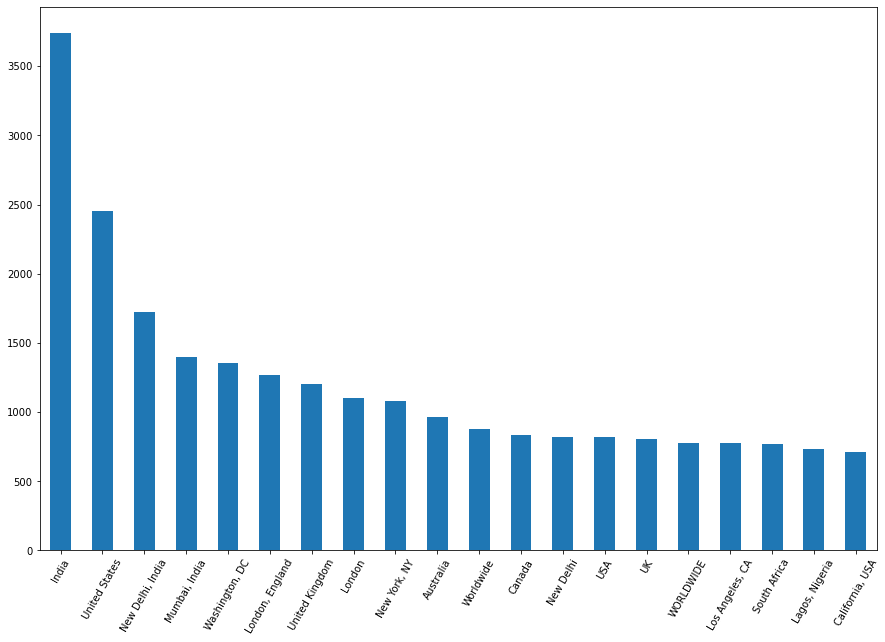

In [19]:
plt.figure(figsize=(15,10))
data['user_location'].value_counts().nlargest(20).plot(kind='bar')
plt.xticks(rotation=60)

In [20]:
data = data.drop_duplicates('text')
data.shape

(178683, 13)

In [21]:
data.source.value_counts()

Twitter Web App              56846
Twitter for Android          40130
Twitter for iPhone           35458
TweetDeck                     8527
Hootsuite Inc.                7317
                             ...  
Ontario_Covid19                  1
Dear_Assistant                   1
That Best Home Automation        1
NippyTweet                       1
Radiology: AI app                1
Name: source, Length: 610, dtype: int64

Visualizing Tweets from different Platforms

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Twitter Web App'),
  Text(1, 0, 'Twitter for Android'),
  Text(2, 0, 'Twitter for iPhone'),
  Text(3, 0, 'TweetDeck'),
  Text(4, 0, 'Hootsuite Inc.'),
  Text(5, 0, 'Twitter for iPad')])

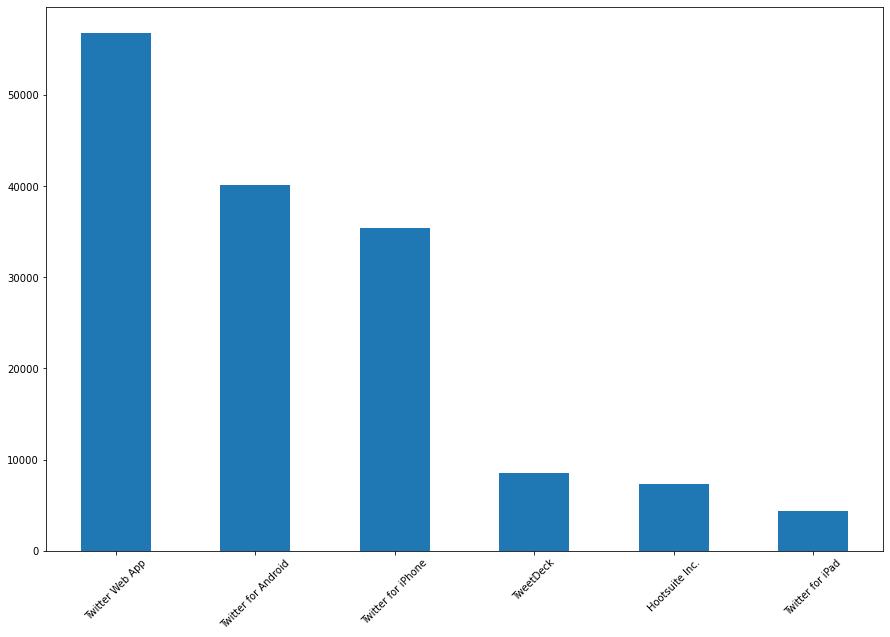

In [22]:
plt.figure(figsize=(15,10))
data['source'].value_counts().nlargest(6).plot(kind='bar')
plt.xticks(rotation=45)

Date sorting

In [23]:
len(data['date'].unique())

136359

In [24]:
data.sort_values(by=['date'], ascending=['True'])
data.head()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
0,áá¥â»Õ¬ê Ï®,astroworld,wednesday addams as a disney princess keepin i...,2017-05-26 05:46:42,624,950,18775,False,2020-07-25 12:27:21,If I smelled the scent of hand sanitizers toda...,NaN,Twitter for iPhone,False
1,Tom Basile ðºð¸,"New York, NY","Husband, Father, Columnist & Commentator. Auth...",2009-04-16 20:06:23,2253,1677,24,True,2020-07-25 12:27:17,Hey @Yankees @YankeesPR and @MLB - wouldn't it...,NaN,Twitter for Android,False
2,Time4fisticuffs,"Pewee Valley, KY",#Christian #Catholic #Conservative #Reagan #Re...,2009-02-28 18:57:41,9275,9525,7254,False,2020-07-25 12:27:14,@diane3443 @wdunlap @realDonaldTrump Trump nev...,['COVID19'],Twitter for Android,False
3,ethel mertz,Stuck in the Middle,#Browns #Indians #ClevelandProud #[]_[] #Cavs ...,2019-03-07 01:45:06,197,987,1488,False,2020-07-25 12:27:10,@brookbanktv The one gift #COVID19 has give me...,['COVID19'],Twitter for iPhone,False
4,DIPR-J&K,Jammu and Kashmir,ðï¸Official Twitter handle of Department o...,2017-02-12 06:45:15,101009,168,101,False,2020-07-25 12:27:08,25 July : Media Bulletin on Novel #CoronaVirus...,"['CoronaVirusUpdates', 'COVID19']",Twitter for Android,False


Dropping unnecessary columns

In [25]:
data.drop(columns={'user_name', 'user_description', 'user_created', 'user_followers',
          'user_friends', 'user_favourites', 'user_verified', 'hashtags', 'source'}, inplace=True)

In [26]:
data.head()

,user_location,date,text,is_retweet
0,astroworld,2020-07-25 12:27:21,If I smelled the scent of hand sanitizers toda...,False
1,"New York, NY",2020-07-25 12:27:17,Hey @Yankees @YankeesPR and @MLB - wouldn't it...,False
2,"Pewee Valley, KY",2020-07-25 12:27:14,@diane3443 @wdunlap @realDonaldTrump Trump nev...,False
3,Stuck in the Middle,2020-07-25 12:27:10,@brookbanktv The one gift #COVID19 has give me...,False
4,Jammu and Kashmir,2020-07-25 12:27:08,25 July : Media Bulletin on Novel #CoronaVirus...,False


In [27]:
pd.set_option('display.max_colwidth', 700)
data.head()

,user_location,date,text,is_retweet
0,astroworld,2020-07-25 12:27:21,"If I smelled the scent of hand sanitizers today on someone in the past, I would think they were so intoxicated thatâ¦ https://t.co/QZvYbrOgb0",False
1,"New York, NY",2020-07-25 12:27:17,Hey @Yankees @YankeesPR and @MLB - wouldn't it have made more sense to have the players pay their respects to the Aâ¦ https://t.co/1QvW0zgyPu,False
2,"Pewee Valley, KY",2020-07-25 12:27:14,@diane3443 @wdunlap @realDonaldTrump Trump never once claimed #COVID19 was a hoax. We all claim that this effort toâ¦ https://t.co/Jkk8vHWHb3,False
3,Stuck in the Middle,2020-07-25 12:27:10,@brookbanktv The one gift #COVID19 has give me is an appreciation for the simple things that were always around meâ¦ https://t.co/Z0pOAlFXcW,False
4,Jammu and Kashmir,2020-07-25 12:27:08,25 July : Media Bulletin on Novel #CoronaVirusUpdates #COVID19 \n@kansalrohit69 @DrSyedSehrish @airnewsalerts @ANIâ¦ https://t.co/MN0EEcsJHh,False


Data Cleaning

In [28]:
! pip install neattext

In [29]:
import neattext as ntx

In [30]:
data['clean_data'] = data['text'].apply(ntx.remove_hashtags)
data['clean_data'] = data['clean_data'].apply(ntx.remove_urls)
data['clean_data'] = data['clean_data'].apply(ntx.remove_userhandles)
data['clean_data'] = data['clean_data'].apply(ntx.remove_multiple_spaces)
data['clean_data'] = data['clean_data'].apply(ntx.remove_special_characters)

In [31]:
data[['clean_data', 'text']].head()

,clean_data,text
0,If I smelled the scent of hand sanitizers today on someone in the past I would think they were so intoxicated that,"If I smelled the scent of hand sanitizers today on someone in the past, I would think they were so intoxicated thatâ¦ https://t.co/QZvYbrOgb0"
1,Hey and wouldnt it have made more sense to have the players pay their respects to the A,Hey @Yankees @YankeesPR and @MLB - wouldn't it have made more sense to have the players pay their respects to the Aâ¦ https://t.co/1QvW0zgyPu
2,Trump never once claimed was a hoax We all claim that this effort to,@diane3443 @wdunlap @realDonaldTrump Trump never once claimed #COVID19 was a hoax. We all claim that this effort toâ¦ https://t.co/Jkk8vHWHb3
3,The one gift has give me is an appreciation for the simple things that were always around me,@brookbanktv The one gift #COVID19 has give me is an appreciation for the simple things that were always around meâ¦ https://t.co/Z0pOAlFXcW
4,25 July Media Bulletin on Novel,25 July : Media Bulletin on Novel #CoronaVirusUpdates #COVID19 \n@kansalrohit69 @DrSyedSehrish @airnewsalerts @ANIâ¦ https://t.co/MN0EEcsJHh


Polarity and Subjectivity of Tweets

In [32]:
! pip install nltk


In [33]:
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [ ]:
lemmatizer = WordNetLemmatizer()
nltk.download('stopwords')
nltk.download('wordnet')

In [35]:
stop_words = stopwords.words('english')
len(stop_words),stop_words[5:10]

(179, ['our', 'ours', 'ourselves', 'you', "you're"])

In [36]:
def sTopWords(tweet):
    clean_tweet = tweet
    clean_tweet = " ".join(word for word in clean_tweet.split() if word not in stop_words)
    return clean_tweet

In [37]:
data['clean_data'] = data['clean_data'].apply(lambda x: sTopWords(x))

In [38]:
data.head()

,user_location,date,text,is_retweet,clean_data
0,astroworld,2020-07-25 12:27:21,"If I smelled the scent of hand sanitizers today on someone in the past, I would think they were so intoxicated thatâ¦ https://t.co/QZvYbrOgb0",False,If I smelled scent hand sanitizers today someone past I would think intoxicated
1,"New York, NY",2020-07-25 12:27:17,Hey @Yankees @YankeesPR and @MLB - wouldn't it have made more sense to have the players pay their respects to the Aâ¦ https://t.co/1QvW0zgyPu,False,Hey wouldnt made sense players pay respects A
2,"Pewee Valley, KY",2020-07-25 12:27:14,@diane3443 @wdunlap @realDonaldTrump Trump never once claimed #COVID19 was a hoax. We all claim that this effort toâ¦ https://t.co/Jkk8vHWHb3,False,Trump never claimed hoax We claim effort
3,Stuck in the Middle,2020-07-25 12:27:10,@brookbanktv The one gift #COVID19 has give me is an appreciation for the simple things that were always around meâ¦ https://t.co/Z0pOAlFXcW,False,The one gift give appreciation simple things always around
4,Jammu and Kashmir,2020-07-25 12:27:08,25 July : Media Bulletin on Novel #CoronaVirusUpdates #COVID19 \n@kansalrohit69 @DrSyedSehrish @airnewsalerts @ANIâ¦ https://t.co/MN0EEcsJHh,False,25 July Media Bulletin Novel


In [39]:
abbreviations = {
    "$" : " dollar ",
    "€" : " euro ",
    "4ao" : "for adults only",
    "a.m" : "before midday",
    "a3" : "anytime anywhere anyplace",
    "aamof" : "as a matter of fact",
    "acct" : "account",
    "adih" : "another day in hell",
    "afaic" : "as far as i am concerned",
    "afaict" : "as far as i can tell",
    "afaik" : "as far as i know",
    "afair" : "as far as i remember",
    "afk" : "away from keyboard",
    "app" : "application",
    "approx" : "approximately",
    "apps" : "applications",
    "asap" : "as soon as possible",
    "asl" : "age, sex, location",
    "atk" : "at the keyboard",
    "ave." : "avenue",
    "aymm" : "are you my mother",
    "ayor" : "at your own risk", 
    "b&b" : "bed and breakfast",
    "b+b" : "bed and breakfast",
    "b.c" : "before christ",
    "b2b" : "business to business",
    "b2c" : "business to customer",
    "b4" : "before",
    "b4n" : "bye for now",
    "b@u" : "back at you",
    "bae" : "before anyone else",
    "bak" : "back at keyboard",
    "bbbg" : "bye bye be good",
    "bbc" : "british broadcasting corporation",
    "bbias" : "be back in a second",
    "bbl" : "be back later",
    "bbs" : "be back soon",
    "be4" : "before",
    "bfn" : "bye for now",
    "blvd" : "boulevard",
    "bout" : "about",
    "brb" : "be right back",
    "bros" : "brothers",
    "brt" : "be right there",
    "bsaaw" : "big smile and a wink",
    "btw" : "by the way",
    "bwl" : "bursting with laughter",
    "c/o" : "care of",
    "cet" : "central european time",
    "cf" : "compare",
    "cia" : "central intelligence agency",
    "csl" : "can not stop laughing",
    "cu" : "see you",
    "cul8r" : "see you later",
    "cv" : "curriculum vitae",
    "cwot" : "complete waste of time",
    "cya" : "see you",
    "cyt" : "see you tomorrow",
    "dae" : "does anyone else",
    "dbmib" : "do not bother me i am busy",
    "diy" : "do it yourself",
    "dm" : "direct message",
    "dwh" : "during work hours",
    "e123" : "easy as one two three",
    "eet" : "eastern european time",
    "eg" : "example",
    "embm" : "early morning business meeting",
    "encl" : "enclosed",
    "encl." : "enclosed",
    "etc" : "and so on",
    "faq" : "frequently asked questions",
    "fawc" : "for anyone who cares",
    "fb" : "facebook",
    "fc" : "fingers crossed",
    "fig" : "figure",
    "fimh" : "forever in my heart", 
    "ft." : "feet",
    "ft" : "featuring",
    "ftl" : "for the loss",
    "ftw" : "for the win",
    "fwiw" : "for what it is worth",
    "fyi" : "for your information",
    "g9" : "genius",
    "gahoy" : "get a hold of yourself",
    "gal" : "get a life",
    "gcse" : "general certificate of secondary education",
    "gfn" : "gone for now",
    "gg" : "good game",
    "gl" : "good luck",
    "glhf" : "good luck have fun",
    "gmt" : "greenwich mean time",
    "gmta" : "great minds think alike",
    "gn" : "good night",
    "g.o.a.t" : "greatest of all time",
    "goat" : "greatest of all time",
    "goi" : "get over it",
    "gps" : "global positioning system",
    "gr8" : "great",
    "gratz" : "congratulations",
    "gyal" : "girl",
    "h&c" : "hot and cold",
    "hp" : "horsepower",
    "hr" : "hour",
    "hrh" : "his royal highness",
    "ht" : "height",
    "ibrb" : "i will be right back",
    "ic" : "i see",
    "icq" : "i seek you",
    "icymi" : "in case you missed it",
    "idc" : "i do not care",
    "idgadf" : "i do not give a damn fuck",
    "idgaf" : "i do not give a fuck",
    "idk" : "i do not know",
    "ie" : "that is",
    "i.e" : "that is",
    "ifyp" : "i feel your pain",
    "IG" : "instagram",
    "iirc" : "if i remember correctly",
    "ilu" : "i love you",
    "ily" : "i love you",
    "imho" : "in my humble opinion",
    "imo" : "in my opinion",
    "imu" : "i miss you",
    "iow" : "in other words",
    "irl" : "in real life",
    "j4f" : "just for fun",
    "jic" : "just in case",
    "jk" : "just kidding",
    "jsyk" : "just so you know",
    "l8r" : "later",
    "lb" : "pound",
    "lbs" : "pounds",
    "ldr" : "long distance relationship",
    "lmao" : "laugh my ass off",
    "lmfao" : "laugh my fucking ass off",
    "lol" : "laughing out loud",
    "ltd" : "limited",
    "ltns" : "long time no see",
    "m8" : "mate",
    "mf" : "motherfucker",
    "mfs" : "motherfuckers",
    "mfw" : "my face when",
    "mofo" : "motherfucker",
    "mph" : "miles per hour",
    "mr" : "mister",
    "mrw" : "my reaction when",
    "ms" : "miss",
    "mte" : "my thoughts exactly",
    "nagi" : "not a good idea",
    "nbc" : "national broadcasting company",
    "nbd" : "not big deal",
    "nfs" : "not for sale",
    "ngl" : "not going to lie",
    "nhs" : "national health service",
    "nrn" : "no reply necessary",
    "nsfl" : "not safe for life",
    "nsfw" : "not safe for work",
    "nth" : "nice to have",
    "nvr" : "never",
    "nyc" : "new york city",
    "oc" : "original content",
    "og" : "original"  ,
    "ohp" : "overhead projector",
    "oic" : "oh i see" ,
    "omdb" : "over my dead body",
    "omg" : "oh my god",
    "omw" : "on my way",
    "p.a" : "per annum",
    "p.m" : "after midday",
    "pm" : "prime minister",
    "poc" : "people of color",
    "pov" : "point of view",
    "pp" : "pages",
    "ppl" : "people",
    "prw" : "parents are watching",
    "ps" : "postscript",
    "pt" : "point",
    "ptb" : "please text back",
    "pto" : "please turn over",
    "qpsa" : "what happens", 
    "ratchet" : "rude",
    "rbtl" : "read between the lines",
    "rlrt" : "real life retweet", 
    "rofl" : "rolling on the floor laughing",
    "roflol" : "rolling on the floor laughing out loud",
    "rotflmao" : "rolling on the floor laughing my ass off",
    "rt" : "retweet",
    "ruok" : "are you ok",
    "sfw" : "safe for work",
     "sk8" : "skate",
    "smh" : "shake my head",
    "sq" : "square",
    "srsly" : "seriously", 
    "ssdd" : "same stuff different day",
    "tbh" : "to be honest",
    "tbs" : "tablespooful",
    "tbsp" : "tablespooful",
    "tfw" : "that feeling when",
    "thks" : "thank you",
    "tho" : "though",
    "thx" : "thank you",
    "tia" : "thanks in advance",
    "til" : "today i learned",
    "tl;dr" : "too long i did not read",
    "tldr" : "too long i did not read",
    "tmb" : "tweet me back",
    "tntl" : "trying not to laugh",
    "ttyl" : "talk to you later",
    "u" : "you",
    "u2" : "you too",
    "u4e" : "yours for ever",
    "utc" : "coordinated universal time",
    "w/" : "with",
    "w/o" : "without",
    "w8" : "wait",
    "wassup" : "what is up",
    "wb" : "welcome back",
    "wtf" : "what the fuck",
    "wtg" : "way to go",
    "wtpa" : "where the party at",
    "wuf" : "where are you from",
    "wuzup" : "what is up",
    "wywh" : "wish you were here",
    "yd" : "yard",
    "ygtr" : "you got that right",
    "ynk" : "you never know",
    "zzz" : "sleeping bored and tired"
}

In [40]:
def convert_abbrev_in_text(tweet):
    t=[]
    words=tweet.split()
    t = [abbreviations[w.lower()] if w.lower() in abbreviations.keys() else w for w in words]
    return ' '.join(t)

In [41]:
data['clean_data'] = data['clean_data'].apply(lambda x: convert_abbrev_in_text(x))

In [42]:
data.head()

,user_location,date,text,is_retweet,clean_data
0,astroworld,2020-07-25 12:27:21,"If I smelled the scent of hand sanitizers today on someone in the past, I would think they were so intoxicated thatâ¦ https://t.co/QZvYbrOgb0",False,If I smelled scent hand sanitizers today someone past I would think intoxicated
1,"New York, NY",2020-07-25 12:27:17,Hey @Yankees @YankeesPR and @MLB - wouldn't it have made more sense to have the players pay their respects to the Aâ¦ https://t.co/1QvW0zgyPu,False,Hey wouldnt made sense players pay respects A
2,"Pewee Valley, KY",2020-07-25 12:27:14,@diane3443 @wdunlap @realDonaldTrump Trump never once claimed #COVID19 was a hoax. We all claim that this effort toâ¦ https://t.co/Jkk8vHWHb3,False,Trump never claimed hoax We claim effort
3,Stuck in the Middle,2020-07-25 12:27:10,@brookbanktv The one gift #COVID19 has give me is an appreciation for the simple things that were always around meâ¦ https://t.co/Z0pOAlFXcW,False,The one gift give appreciation simple things always around
4,Jammu and Kashmir,2020-07-25 12:27:08,25 July : Media Bulletin on Novel #CoronaVirusUpdates #COVID19 \n@kansalrohit69 @DrSyedSehrish @airnewsalerts @ANIâ¦ https://t.co/MN0EEcsJHh,False,25 July Media Bulletin Novel


In [43]:
! pip install textblob

In [44]:
from textblob import TextBlob

In [45]:
def txt_blob(text):
    senti = TextBlob(text)
    senti_polarity = senti.sentiment.polarity
    senti_subjectivity = senti.sentiment.subjectivity

    if senti_polarity > 0:
        ans = 'Positive'
    elif senti_polarity < 0:
        ans = 'Negative'
    elif senti_polarity == 0:
        ans = 'Neutral'

    result = {'Polarity':senti_polarity, 'Subjectivity':senti_subjectivity, 'Sentiment':ans}

    return result

In [46]:
test = txt_blob(data['clean_data'][5])
test['Actual text'] = data['clean_data'][5]
test


{'Polarity': -0.6999999999999998,
 'Subjectivity': 0.6666666666666666,
 'Sentiment': 'Negative',
 'Actual text': 'deaths continue rise Its almost bad ever Politicians businesses want'}

In [47]:
print(len(data['clean_data']))

178683


In [48]:
main = []
for x in data['clean_data']:
    data_dict = txt_blob(x)
    data_dict['Actual Text'] = x
    main.append(data_dict)    

In [49]:
prediected = pd.DataFrame(main)

In [50]:
prediected.head()

,Polarity,Subjectivity,Sentiment,Actual Text
0,-0.25,0.250000,Negative,If I smelled scent hand sanitizers today someone past I would think intoxicated
1,0.00,0.000000,Neutral,Hey wouldnt made sense players pay respects A
2,0.00,0.000000,Neutral,Trump never claimed hoax We claim effort
3,0.00,0.357143,Neutral,The one gift give appreciation simple things always around
4,0.00,0.000000,Neutral,25 July Media Bulletin Novel


In [51]:
prediected.shape

(178683, 4)

In [52]:
count = 0
for all in prediected['Sentiment']:
    if all == "Positive":
        count +=1        
print("Positive : ",count)

Positive :  69546


In [53]:
count = 0
for all in prediected['Sentiment']:
    if all == "Negative":
        count +=1
print("Negative : ",count)

Negative :  29597


In [54]:
count = 0
for all in prediected['Sentiment']:
    if all == "Neutral":
        count +=1
print("Neutral : ",count)

Neutral :  79540


In [55]:
from nltk.tokenize import RegexpTokenizer

# tokenizer for words, i.e. any length word (alphanumeric) characters separated by a whitespace
tokenizer = RegexpTokenizer(r'\w+')

data["tokens"] = data["clean_data"].apply(tokenizer.tokenize)
data.head()

,user_location,date,text,is_retweet,clean_data,tokens
0,astroworld,2020-07-25 12:27:21,"If I smelled the scent of hand sanitizers today on someone in the past, I would think they were so intoxicated thatâ¦ https://t.co/QZvYbrOgb0",False,If I smelled scent hand sanitizers today someone past I would think intoxicated,"[If, I, smelled, scent, hand, sanitizers, today, someone, past, I, would, think, intoxicated]"
1,"New York, NY",2020-07-25 12:27:17,Hey @Yankees @YankeesPR and @MLB - wouldn't it have made more sense to have the players pay their respects to the Aâ¦ https://t.co/1QvW0zgyPu,False,Hey wouldnt made sense players pay respects A,"[Hey, wouldnt, made, sense, players, pay, respects, A]"
2,"Pewee Valley, KY",2020-07-25 12:27:14,@diane3443 @wdunlap @realDonaldTrump Trump never once claimed #COVID19 was a hoax. We all claim that this effort toâ¦ https://t.co/Jkk8vHWHb3,False,Trump never claimed hoax We claim effort,"[Trump, never, claimed, hoax, We, claim, effort]"
3,Stuck in the Middle,2020-07-25 12:27:10,@brookbanktv The one gift #COVID19 has give me is an appreciation for the simple things that were always around meâ¦ https://t.co/Z0pOAlFXcW,False,The one gift give appreciation simple things always around,"[The, one, gift, give, appreciation, simple, things, always, around]"
4,Jammu and Kashmir,2020-07-25 12:27:08,25 July : Media Bulletin on Novel #CoronaVirusUpdates #COVID19 \n@kansalrohit69 @DrSyedSehrish @airnewsalerts @ANIâ¦ https://t.co/MN0EEcsJHh,False,25 July Media Bulletin Novel,"[25, July, Media, Bulletin, Novel]"


In [56]:
# get a list of all words in the tokenized tweets 
all_words = [word for tokens in data["tokens"] for word in tokens]

# get a list of tweet lengths in the set tokenized tweets
sentence_lengths = [len(tokens) for tokens in data["tokens"]]

# list all unique words in the dataset and sort it for future convenience
VOCAB = sorted(list(set(all_words)))

print(f'{len(all_words)} words total, vocabulary size of {len(VOCAB)}')
print(f'Max sentence length is {max(sentence_lengths)}')

1685369 words total, vocabulary size of 120314
Max sentence length is 47


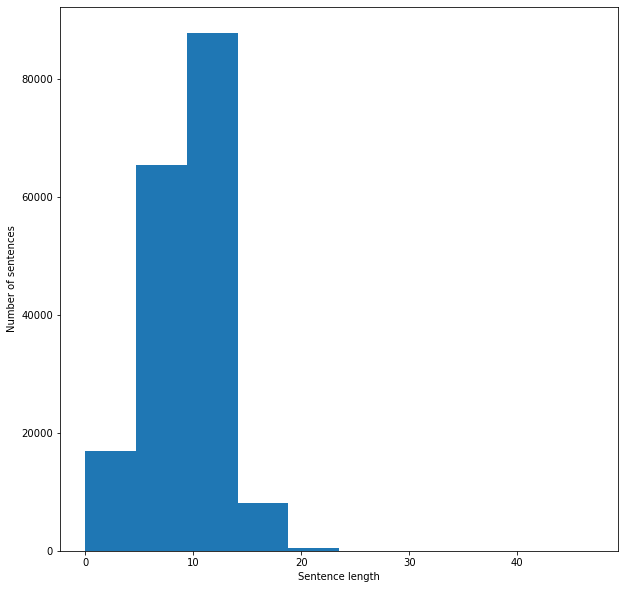

In [57]:
import matplotlib.pyplot as plt

# plot histogram of sentence lengths vs their frequency of occurence 
fig = plt.figure(figsize=(10, 10)) 
plt.xlabel('Sentence length')
plt.ylabel('Number of sentences')
plt.hist(sentence_lengths)
plt.show()

Counter({' happy': 4, ' fearful': 3, ' attracted': 3, ' powerless': 2, ' sad': 2, ' entitled': 2, ' esteemed': 1, ' embarrassed': 1, ' hated': 1, ' free': 1, ' lost': 1, ' attached': 1})


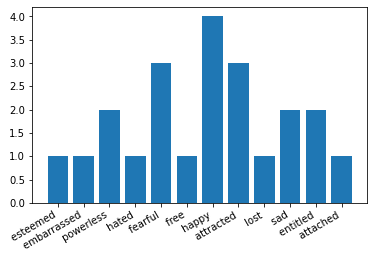

In [58]:
from collections import Counter

clean_data = data.copy()

text_tweets = list(clean_data['clean_data'])

final_words = [text.lower() for text in text_tweets ] 

# # Get emotions text
emotion_list = []

with open('emotion_cluster.txt', 'r') as file:
    for line in file:
        clear_line = line.replace('\n', '').replace(',', '').replace("'", '').strip()
        word, emotion = clear_line.split(':')
        if word in final_words:
            emotion_list.append(emotion)

w = Counter(emotion_list)
print(w)

fig, ax1 = plt.subplots()
ax1.bar(w.keys(), w.values())
fig.autofmt_xdate()
plt.savefig('graph.png')
plt.show()

Applying AffinityPropagation

In [59]:
# list(w.values())
dict(w)

{' esteemed': 1,
 ' embarrassed': 1,
 ' powerless': 2,
 ' hated': 1,
 ' fearful': 3,
 ' free': 1,
 ' happy': 4,
 ' attracted': 3,
 ' lost': 1,
 ' sad': 2,
 ' entitled': 2,
 ' attached': 1}

In [74]:
w

Counter({' esteemed': 1,
         ' embarrassed': 1,
         ' powerless': 2,
         ' hated': 1,
         ' fearful': 3,
         ' free': 1,
         ' happy': 4,
         ' attracted': 3,
         ' lost': 1,
         ' sad': 2,
         ' entitled': 2,
         ' attached': 1})

In [60]:
from sklearn.cluster import AffinityPropagation
from sklearn import metrics
# from sklearn.datasets.samples_generator import make_blobs
from sklearn.datasets import make_blobs
  
# Generate sample data
ESTEEMED = 1
HAPPY = 4
FREE = -1
SAD = 2

centers = [[1, ESTEEMED], [2, HAPPY], [3, FREE], [4, SAD]]
X, labels_true = make_blobs(n_samples = 400, centers = centers,
                           cluster_std = 0.5, random_state = 0)
  
# Compute Affinity Propagation
af = AffinityPropagation(preference =-50).fit(X)
cluster_centers_indices = af.cluster_centers_indices_
labels = af.labels_
  
n_clusters_ = len(cluster_centers_indices)

C:\Users\user\anaconda3\lib\site-packages\sklearn\cluster\_affinity_propagation.py:148: FutureWarning: 'random_state' has been introduced in 0.23. It will be set to None starting from 1.0 (renaming of 0.25) which means that results will differ at every function call. Set 'random_state' to None to silence this warning, or to 0 to keep the behavior of versions <0.23.
  warnings.warn(


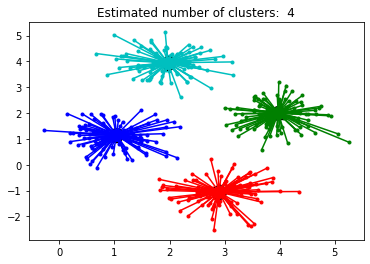

In [61]:
# Plot result
import matplotlib.pyplot as plt
from itertools import cycle

plt.close('all')
plt.figure(1)
plt.clf()

colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')

for k, col in zip(range(n_clusters_), colors):
	class_members = labels == k
	cluster_center = X[cluster_centers_indices[k]]
	plt.plot(X[class_members, 0], X[class_members, 1], col + '.')
	plt.plot(cluster_center[0], cluster_center[1], 'o',
			markerfacecolor = col, markeredgecolor ='k',
			markersize = 14)

	for x in X[class_members]:
		plt.plot([cluster_center[0], x[0]],
				[cluster_center[1], x[1]], col)

plt.title('Estimated number of clusters: % d' % n_clusters_)
plt.show()

In [62]:
# remove this cell
data.head()

,user_location,date,text,is_retweet,clean_data,tokens
0,astroworld,2020-07-25 12:27:21,"If I smelled the scent of hand sanitizers today on someone in the past, I would think they were so intoxicated thatâ¦ https://t.co/QZvYbrOgb0",False,If I smelled scent hand sanitizers today someone past I would think intoxicated,"[If, I, smelled, scent, hand, sanitizers, today, someone, past, I, would, think, intoxicated]"
1,"New York, NY",2020-07-25 12:27:17,Hey @Yankees @YankeesPR and @MLB - wouldn't it have made more sense to have the players pay their respects to the Aâ¦ https://t.co/1QvW0zgyPu,False,Hey wouldnt made sense players pay respects A,"[Hey, wouldnt, made, sense, players, pay, respects, A]"
2,"Pewee Valley, KY",2020-07-25 12:27:14,@diane3443 @wdunlap @realDonaldTrump Trump never once claimed #COVID19 was a hoax. We all claim that this effort toâ¦ https://t.co/Jkk8vHWHb3,False,Trump never claimed hoax We claim effort,"[Trump, never, claimed, hoax, We, claim, effort]"
3,Stuck in the Middle,2020-07-25 12:27:10,@brookbanktv The one gift #COVID19 has give me is an appreciation for the simple things that were always around meâ¦ https://t.co/Z0pOAlFXcW,False,The one gift give appreciation simple things always around,"[The, one, gift, give, appreciation, simple, things, always, around]"
4,Jammu and Kashmir,2020-07-25 12:27:08,25 July : Media Bulletin on Novel #CoronaVirusUpdates #COVID19 \n@kansalrohit69 @DrSyedSehrish @airnewsalerts @ANIâ¦ https://t.co/MN0EEcsJHh,False,25 July Media Bulletin Novel,"[25, July, Media, Bulletin, Novel]"


In [63]:
from sklearn.feature_extraction.text import CountVectorizer

sentences = ['John is upset and depressed', 'John happay and enjoying.']

vectorizer = CountVectorizer(min_df=0, lowercase=False)
vectorizer.fit(sentences)
vectorizer.vocabulary_

{'John': 0,
 'is': 5,
 'upset': 6,
 'and': 1,
 'depressed': 2,
 'happay': 4,
 'enjoying': 3}

In [64]:
sentences

['John is upset and depressed', 'John happay and enjoying.']

In [65]:
vectorizer.transform(sentences).toarray()

array([[1, 1, 1, 0, 0, 1, 1],
       [1, 1, 0, 1, 1, 0, 0]], dtype=int64)

In [73]:
from sklearn.model_selection import train_test_split

df_yelp = data[data['is_retweet'] == False]

sentences = df_yelp['clean_data'].values
y = df_yelp['text'].values

sentences_train, sentences_test, y_train, y_test = train_test_split(sentences, y, test_size=0.25, random_state=1000)

In [79]:
y_test = emotion

In [80]:
y_test

' sad'

In [ ]:
y_train

In [ ]:
y_test

In [ ]:
y_train[1]

"IPL: Rajasthan Royals' fielding coach Dishant Yagnik tests positive for #Covid19\n\nhttps://t.co/2ImTAGW32g https://t.co/i0I07kMQVQ"

In [ ]:
y_train

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
vectorizer.fit(sentences_train)

X_train = vectorizer.transform(sentences_train)
X_test  = vectorizer.transform(sentences_test)
X_train

<134012x82254 sparse matrix of type '<class 'numpy.int64'>'
	with 1207142 stored elements in Compressed Sparse Row format>

In [ ]:
#from sklearn.linear_model import LogisticRegression

#classifier = LogisticRegression()
#classifier.fit(X_train, y_train)
#score = classifier.score(X_test, y_test)

#print('Accuracy:', score)


In [ ]:
#from sklearn import naive_bayes
#nbmodel = naive_bayes.GaussianNB()
#nbmodel.fit(X_train, y_train)
#ypred = nbmodel.predict(X_test)



In [ ]:
! pip install keras

  Using cached keras-2.8.0-py2.py3-none-any.whl (1.4 MB)


In [ ]:
cities = ['London', 'Berlin', 'Berlin', 'New York', 'London','India']
cities

['London', 'Berlin', 'Berlin', 'New York', 'London', 'India']

In [ ]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
city_labels = encoder.fit_transform(cities)
city_labels

array([2, 0, 0, 3, 2, 1], dtype=int64)

In [ ]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse=False)
city_labels = city_labels.reshape((6, 1))
encoder.fit_transform(city_labels)

array([[0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.]])

In [ ]:
! pip install tensorflow

In [ ]:
from keras_preprocessing.text import Tokenizer

tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(sentences_train)

X_train = tokenizer.texts_to_sequences(sentences_train)
X_test = tokenizer.texts_to_sequences(sentences_test)

vocab_size = len(tokenizer.word_index) + 1  # Adding 1 because of reserved 0 index

print(sentences_train[2])
print(X_train[2])

To healthcare organisations sending daily twice daily updates Please reach need h
[86, 352, 2534, 1045, 74, 2535, 74, 282, 60, 730, 22, 390]


In [ ]:
from keras.preprocessing.sequence import pad_sequences
maxlen = 100

X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)

print(X_train[0, :])

[ 475    9    8    9 2517    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0]


In [ ]:
for word in ['the', 'all', 'happy', 'sad']: print('{}: {}'.format(word, tokenizer.word_index[word]))

the: 2
all: 160
happy: 368
sad: 698


In [ ]:
from keras_preprocessing.sequence import pad_sequences

maxlen = 100

X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)

In [ ]:
from keras.models import Sequential
from keras import layers

embedding_dim = 50

model = Sequential()
model.add(layers.Embedding(input_dim=vocab_size, 
                           output_dim=embedding_dim, 
                           input_length=maxlen))
model.add(layers.Flatten())
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 100, 50)           4114500   
                                                                 
 flatten (Flatten)           (None, 5000)              0         
                                                                 
 dense_4 (Dense)             (None, 10)                50010     
                                                                 
 dense_5 (Dense)             (None, 1)                 11        
                                                                 
Total params: 4,164,521
Trainable params: 4,164,521
Non-trainable params: 0
_________________________________________________________________


In [ ]:
from keras.models import Sequential
from keras import layers

embedding_dim = 50

model = Sequential()
model.add(layers.Embedding(input_dim=vocab_size, 
                           output_dim=embedding_dim, 
                           input_length=maxlen))
model.add(layers.GlobalMaxPool1D())
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 50)           4114500   
                                                                 
 global_max_pooling1d (Globa  (None, 50)               0         
 lMaxPooling1D)                                                  
                                                                 
 dense (Dense)               (None, 10)                510       
                                                                 
 dense_1 (Dense)             (None, 1)                 11        
                                                                 
Total params: 4,115,021
Trainable params: 4,115,021
Non-trainable params: 0
_________________________________________________________________


In [ ]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

In [ ]:
history = model.fit(X_train, y_train,
                    epochs=50,
                    verbose=False,
                    validation_data=(X_test, y_test),
                    batch_size=10)
loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))
plot_history(history)

In [ ]:
import numpy as np

def create_embedding_matrix(filepath, word_index, embedding_dim):
    vocab_size = len(word_index) + 1  # Adding again 1 because of reserved 0 index
    embedding_matrix = np.zeros((vocab_size, embedding_dim))

    with open(filepath) as f:
        for line in f:
            word, *vector = line.split()
            if word in word_index:
                idx = word_index[word] 
                embedding_matrix[idx] = np.array(
                    vector, dtype=np.float32)[:embedding_dim]

    return embedding_matrix

In [ ]:
embedding_dim = 100

model = Sequential()
model.add(layers.Embedding(vocab_size, embedding_dim, input_length=maxlen))
model.add(layers.Conv1D(128, 5, activation='relu'))
model.add(layers.GlobalMaxPooling1D())
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 100, 100)          8229000   
                                                                 
 conv1d (Conv1D)             (None, 96, 128)           64128     
                                                                 
 global_max_pooling1d_1 (Glo  (None, 128)              0         
 balMaxPooling1D)                                                
                                                                 
 dense_2 (Dense)             (None, 10)                1290      
                                                                 
 dense_3 (Dense)             (None, 1)                 11        
                                                                 
Total params: 8,294,429
Trainable params: 8,294,429
Non-trainable params: 0
____________________________________________

In [ ]:
history = model.fit(X_train, y_train,
                    epochs=10,
                    verbose=False,
                    validation_data=(X_test, y_test),
                    batch_size=10)
loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))
plot_history(history)

In [ ]:
# Refresnce link
# https://realpython.com/python-keras-text-classification/#what-is-a-word-embedding
